## Finding underlying structures in flowers

(The 'hello world'-example of clustering algorithms)

In this example we explore a dataset of flowers for underlying structures. We examine the data, try to guess the number of different classes and then apply a k-means clustering algorithm (http://scikit-learn.org/stable/modules/clustering.html#k-means)

### First explore the data set

In [78]:
# Importing necessary libraries
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from sklearn.cluster import KMeans

In [114]:
# Loading a flowers dataset
iris_data = datasets.load_iris()

In [61]:
# Inspect the data numerically
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


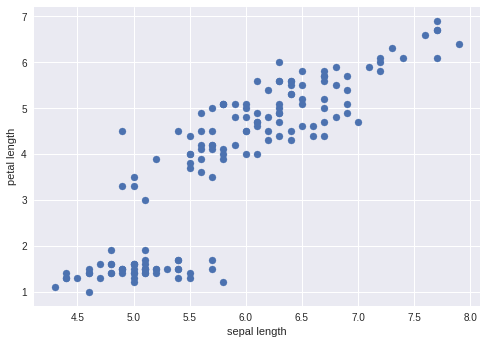

In [77]:
# Inspect the data visually with two relevant features
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

### Estimate the number of classes with the elbow method

Now we try to find the right number of clusters in the dataset by calculating the sum of the squared distances within the clusters

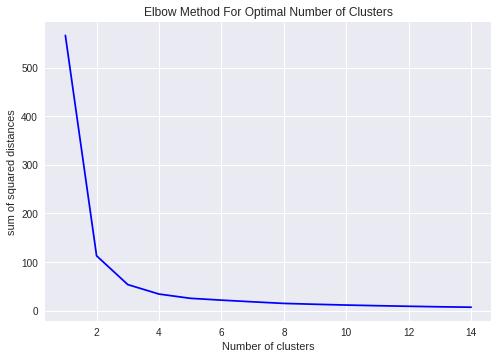

In [82]:
# Calculate the distances for 1 to 15 clusters
squared_distances = []
number_of_clusters = range(1,15)
for k in number_of_clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df.iloc[:, [0,2]])
    squared_distances.append(km.inertia_)
    
# Plotting these distances for comparisation
plt.plot(number_of_clusters, squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

### Predict the number of classes with k-means

Set the number of clusters (n_clusters), train the model and make the predictions

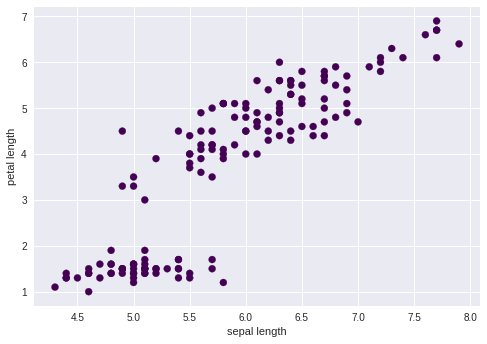

In [110]:
# Create the model and initialize it with the supposed number of clusters
# TODO: Set the parameter n_clusters to the number of clusters
model = KMeans(n_clusters=1)

# Fit the model and predict the classes
predicted_classes = model.fit_predict(iris_df)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=predicted_classes,cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

### Compare predictions with the real clusters in the dataset

Now compare the clustering of the flowers with the target variable in the dataset. How did you do?

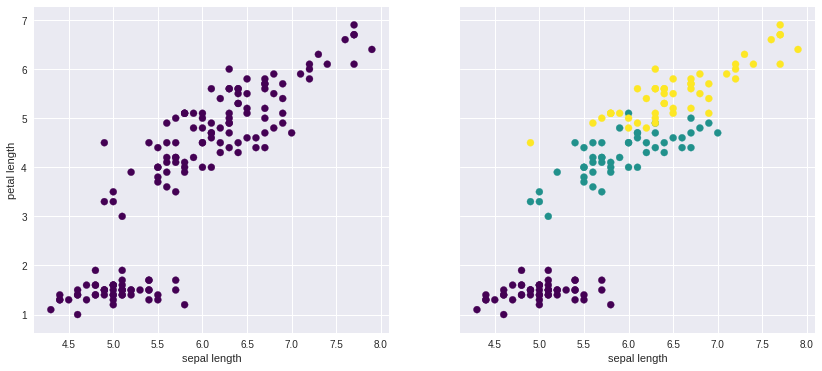

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax1.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=predicted_classes,cmap='viridis')
ax2.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=iris_data.target,cmap='viridis')
ax1.set_ylabel('petal length')
ax1.set_xlabel('sepal length')
ax2.set_xlabel('sepal length')
plt.show()